In [434]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [496]:
mentalHealth = pd.read_csv('MentalHealthData.csv', sep=',')
#mentalHealth

# Cleaning the data

In [497]:
# The recording date ('Timestamp') is not of interest in this analysis
# All data is within a 2 year period
# Comments will be used in with later analysis but not needed for any testing
# States can be considered later if looking at US data specificaly but not important at the moment
mentalHealth = mentalHealth.drop('Timestamp', axis=1)
mentalHealth = mentalHealth.drop('comments', axis=1)
mentalHealth = mentalHealth.drop('state', axis=1)

In [569]:

mentalHealth

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,36,Male,France,Yes,Yes,No,Don't know,6-25,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
20,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,Male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,Male,United Kingdom,No,No,Yes,Don't know,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,United States,No,No,No,Don't know,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [567]:
mentalHealth.to_csv("Mental_Health_Intial_Prep")

## Age Column

In [499]:
mentalHealth['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [439]:
# Delete any rows with entries that fall outside the scope of reasonable age (-29, 99999999999, -1726, -1, 329)
# As we are looking at working individuals anybody under the age of 18 will not be counted in this study (5, 8)
# Care about ages bettween 18 and 75

In [500]:
mentalHealth.drop(mentalHealth.loc[mentalHealth['Age']<18].index, inplace=True)
mentalHealth.drop(mentalHealth.loc[mentalHealth['Age']>75].index, inplace=True)

In [501]:
mentalHealth['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

In [442]:
# Should I group age ranges?

## Gender Column

In [502]:
mentalHealth['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [503]:
# Cleaning 'Gender' Column
# Male group
mentalHealth['Gender'] = mentalHealth['Gender'].replace({'M':'Male', 'male':'Male', 'm':'Male', 'Male-ish':'Male',
                        'maile':'Male','Mal':'Male', 'Make':'Male', 'Man':'Male', 'msle':'Male',
                        'Mail':'Male', 'Malr':'Male', 'Male ':'Male', 'Cis Male':'Male', 
                        'Male (CIS)':'Male', 'cis Male':'Male', 'Cis Man':'Male', 'cis male':'Male'})
# Female group
mentalHealth['Gender'] = mentalHealth['Gender'].replace({'female':'Female', 'F':'Female', 'Woman':'Female',
                         'f':'Female', 'Femake':'Female', 'woman':'Female', 'Female ':'Female',
                        'femail':'Female', 'Cis Female':'Female', 'cis-female/femme':'Female',
                         'Female (cis)':'Female'})
# Other group
# This group contains all transgender, non-binary, or not gender specific individuals
mentalHealth['Gender'] = mentalHealth['Gender'].replace({'Trans-female':'Other', 'something kinda male?':'Other', 'queer/she/they':'Other',
                        'non-binary':'Other', 'Nah':'Other', 'All':'Other', 'Enby':'Other', 'fluid':'Other',
                        'Genderqueer':'Other', 'Androgyne':'Other', 'Agender':'Other', 'Guy (-ish) ^_^':'Other',
                        'male leaning androgynous':'Other', 'Trans woman':'Other', 'Neuter':'Other',
                        'Female (trans)':'Other', 'queer':'Other', 'A little about you':'Other', 'p':'Other',
                        'ostensibly male, unsure what that really means':'Other'})

In [504]:
mentalHealth['Gender'].isna().sum()

0

In [505]:
mentalHealth['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [447]:
# Categorized the gender data into three categories: Male, Female, Other

## Country and state Columns

In [448]:
# Dropped state column as interest would lie based on country 
# Would test states if only looking at US data

In [506]:
mentalHealth['Country'].isna().sum()

0

In [451]:
# Should I care about location?
# Should i break into USA vs Foreign Countries?
# Can I just look at US data?

## self_employed Column

In [507]:
mentalHealth['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [508]:
mentalHealth['self_employed'].isna().sum()

18

In [509]:
mentalHealth.drop(mentalHealth.loc[mentalHealth['self_employed'].isna()].index, inplace=True)

In [455]:
# With no recorded emplyment type we will remove entries as there are only 18

## family_history Column

In [510]:
mentalHealth['family_history'].unique()

array(['Yes', 'No'], dtype=object)

## treatment Column

In [511]:
mentalHealth['treatment'].unique()

array(['No', 'Yes'], dtype=object)

## work_interfere Column

In [512]:
# Change assignment for entries (4+ response types), encode them for testing
mentalHealth['work_interfere'].unique()
# Encoding of 'work_interfere' entries
# Never = 1, Rarely = 2, Sometimes = 3, Often = 4
# nan = ???

array(['Sometimes', nan, 'Never', 'Often', 'Rarely'], dtype=object)

In [513]:
mentalHealth['work_interfere'].isna().sum()

262

In [ ]:
# What to do with missing values
    # Drop values from dataset?
    # Create new variable "Don't know"

In [514]:
# For now assign the missing values to "Don't know"
# Due to no reponse we are going to assume they havent specifically noticed
# any interference and didnt know how to respond
mentalHealth['work_interfere'] = mentalHealth['work_interfere'].fillna('Don\'t know')
print(mentalHealth['work_interfere'].unique(), mentalHealth['work_interfere'].isna().sum())

['Sometimes' "Don't know" 'Never' 'Often' 'Rarely'] 0


## no_employees Column

In [515]:
mentalHealth['no_employees'].unique()

array(['1-5', '6-25', '100-500', '26-100', 'More than 1000', '500-1000'],
      dtype=object)

## remote_work Column

In [516]:
mentalHealth['remote_work'].unique()

array(['Yes', 'No'], dtype=object)

## tech_company Column

In [517]:
mentalHealth['tech_company'].unique()

array(['Yes', 'No'], dtype=object)

## benefits Column

In [518]:
mentalHealth['benefits'].unique()

array(['Yes', 'No', "Don't know"], dtype=object)

## care_options Column

In [519]:
mentalHealth['care_options'].unique()

array(['Not sure', 'No', 'Yes'], dtype=object)

## wellness_program Column

In [520]:
mentalHealth['wellness_program'].unique()

array(['Yes', 'No', "Don't know"], dtype=object)

## seek_help Column

In [521]:
mentalHealth['seek_help'].unique()

array(["Don't know", 'No', 'Yes'], dtype=object)

## anonymity Column

In [522]:
mentalHealth['anonymity'].unique()

array(['Yes', 'No', "Don't know"], dtype=object)

## leave Column

In [523]:
mentalHealth['leave'].unique()
# Encoding of 'leave' entries
# Don't know = 0, Very difficult = 1, Somewhat difficult = 2, Somewhat easy = 3, Very easy = 4

array(['Very easy', 'Somewhat easy', 'Somewhat difficult', "Don't know",
       'Very difficult'], dtype=object)

In [398]:
#For first cleaning process we are going to understand the data that is present and then when going into deep
    # I will encode the data

#leaveCol = mentalHealth.loc[:,('leave')].replace(["Don't know", "Very difficult", "Somewhat difficult", "Somewhat easy", 
#                                       "Very easy"],[0,1,2,3,4],inplace=True)
#leaveCol

In [461]:
#mentalHealth['leave'].astype('int64')

In [ ]:
# Encoded the values with numerical entries for for analysis opportunities

## mental_health_consequence Column

In [524]:
mentalHealth['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

## phys_health_consequence Column

In [525]:
mentalHealth['phys_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

## coworkers Column

In [526]:
mentalHealth['coworkers'].unique()

array(['Yes', 'Some of them', 'No'], dtype=object)

## supervisor Column

In [527]:
mentalHealth['supervisor'].unique()

array(['Yes', 'Some of them', 'No'], dtype=object)

## mental_health_interview Column

In [528]:
mentalHealth['mental_health_interview'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

## phys_health_interview Column

In [529]:
mentalHealth['phys_health_interview'].unique()

array(['Yes', 'Maybe', 'No'], dtype=object)

## mental_vs_physical Column

In [530]:
mentalHealth['mental_vs_physical'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

## obs_consequence Column

In [531]:
mentalHealth['obs_consequence'].unique()

array(['Yes', 'No'], dtype=object)

# Some Basic Data Understanding After Inital Cleaning

In [532]:
mentalHealth.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [566]:
mentalHealth.dtypes

Age                           int64
Gender                       object
Country                      object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

In [533]:
mentalHealth['Age'].describe()

count    1233.000000
mean       32.061638
std         7.305337
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

In [534]:
mentalHealth['Gender'].value_counts()

Gender
Male      973
Female    242
Other      18
Name: count, dtype: int64

In [535]:
mentalHealth['Country'].value_counts()

Country
United States             735
United Kingdom            182
Canada                     68
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Austria                     3
Bulgaria                    3
Mexico                      3
Russia                      3
Finland                     3
Denmark                     2
Greece                      2
Colombia                    2
Portugal                    2
Croatia                     2
Moldova                     1
Georgia                     1
China                       1
Thailand                    1
Cz

In [536]:
mentalHealth['self_employed'].value_counts()

self_employed
No     1091
Yes     142
Name: count, dtype: int64

In [537]:
mentalHealth['family_history'].value_counts()

family_history
No     751
Yes    482
Name: count, dtype: int64

In [538]:
mentalHealth['treatment'].value_counts()

treatment
Yes    623
No     610
Name: count, dtype: int64

In [539]:
mentalHealth['work_interfere'].value_counts()

work_interfere
Sometimes     457
Don't know    262
Never         206
Rarely        170
Often         138
Name: count, dtype: int64

In [540]:
mentalHealth['no_employees'].value_counts()

no_employees
6-25              283
26-100            283
More than 1000    280
100-500           172
1-5               156
500-1000           59
Name: count, dtype: int64

In [541]:
mentalHealth['remote_work'].value_counts()

remote_work
No     868
Yes    365
Name: count, dtype: int64

In [542]:
mentalHealth['tech_company'].value_counts()

tech_company
Yes    1009
No      224
Name: count, dtype: int64

In [543]:
mentalHealth['benefits'].value_counts()

benefits
Yes           466
Don't know    400
No            367
Name: count, dtype: int64

In [544]:
mentalHealth['care_options'].value_counts()

care_options
No          492
Yes         434
Not sure    307
Name: count, dtype: int64

In [545]:
mentalHealth['wellness_program'].value_counts()

wellness_program
No            824
Yes           227
Don't know    182
Name: count, dtype: int64

In [546]:
mentalHealth['seek_help'].value_counts()

seek_help
No            632
Don't know    355
Yes           246
Name: count, dtype: int64

In [547]:
mentalHealth['anonymity'].value_counts()

anonymity
Don't know    802
Yes           370
No             61
Name: count, dtype: int64

In [548]:
mentalHealth['leave'].value_counts()

leave
Don't know            552
Somewhat easy         262
Very easy             202
Somewhat difficult    121
Very difficult         96
Name: count, dtype: int64

In [549]:
mentalHealth['mental_health_consequence'].value_counts()

mental_health_consequence
No       476
Maybe    471
Yes      286
Name: count, dtype: int64

In [550]:
mentalHealth['phys_health_consequence'].value_counts()

phys_health_consequence
No       905
Maybe    272
Yes       56
Name: count, dtype: int64

In [551]:
mentalHealth['coworkers'].value_counts()

coworkers
Some of them    763
No              256
Yes             214
Name: count, dtype: int64

In [552]:
mentalHealth['supervisor'].value_counts()

supervisor
Yes             501
No              385
Some of them    347
Name: count, dtype: int64

In [553]:
mentalHealth['mental_health_interview'].value_counts()

mental_health_interview
No       994
Maybe    201
Yes       38
Name: count, dtype: int64

In [554]:
mentalHealth['phys_health_interview'].value_counts()

phys_health_interview
Maybe    547
No       490
Yes      196
Name: count, dtype: int64

In [555]:
mentalHealth['mental_vs_physical'].value_counts()

mental_vs_physical
Don't know    566
Yes           336
No            331
Name: count, dtype: int64

In [556]:
mentalHealth['obs_consequence'].value_counts()

obs_consequence
No     1054
Yes     179
Name: count, dtype: int64

## Random data manipulation

In [562]:
bins = [18,26,34,42,50,58,64,72]
binnedAge = pd.cut(mentalHealth['Age'], bins)
binnedAge.value_counts()

Age
(26, 34]    562
(18, 26]    283
(34, 42]    275
(42, 50]     80
(50, 58]     20
(58, 64]      4
(64, 72]      2
Name: count, dtype: int64

## Graphs to visualize data distribution

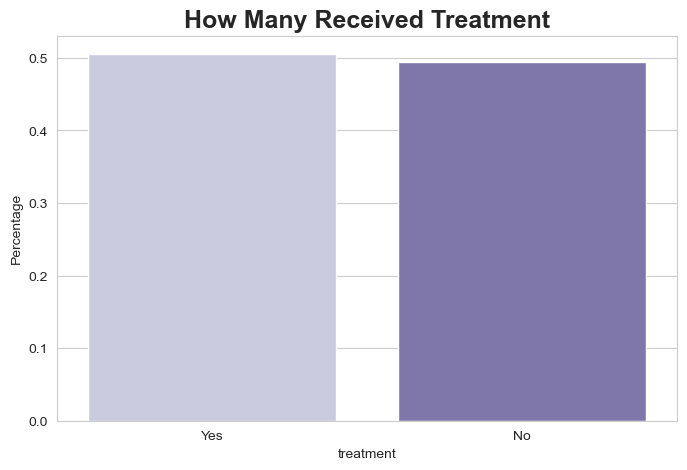

In [557]:
plt.figure(figsize = (8,5))
plt.title('How Many Received Treatment', fontsize=18, fontweight='bold')
percentage = mentalHealth['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = percentage, palette='Purples')

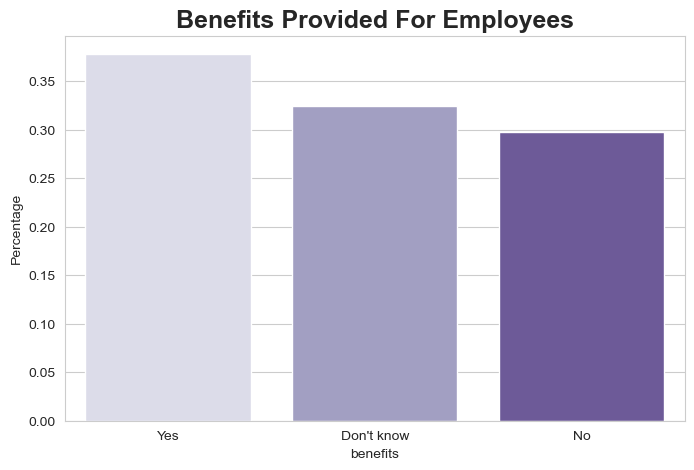

In [558]:
plt.figure(figsize = (8,5))
plt.title('Benefits Provided For Employees', fontsize=18, fontweight='bold')
percentage = mentalHealth['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'benefits', y = 'Percentage', data = percentage, palette='Purples')